<h1>Introduction</h1>
<p>Welcome! In this notebook i'm going to analyze different asteroids data and implement a Machine Learning Classfier to predict the hazard for different asteroids</p>
<h3>My main objectives on this project are:</h3>   
<ul>
    <li>Applying exploratory data analysis and trying to get some insights about our dataset</li>
    <li>Getting data in better shape by transforming and feature engineering to help us in building better models</li>
    <li>Building and tuning a XGBClassifer to get some results on predicting Hazard</li>
</ul>

<h2>Importing Libraries</h2>
<p>Lets start by importing some packages we are going to need</p>

In [85]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import seaborn as sns

<h2>Meeting the data</h2>
<p>Lets open the data and see what we have</p>

In [86]:
#Opening the data
data = pd.read_csv('./nasa.csv')

In [87]:
#Lets see the shapes of the data so we know what we are dealing with
data.shape

(4687, 40)

In [88]:
#lets observe some of his elements
data.head(10)

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   
5           3671135  3671135                19.6            0.319562   
6           2495323  2495323                19.6            0.319562   
7           2153315  2153315                19.2            0.384198   
8           2162463  2162463                17.8            0.732074   
9           2306383  2306383                21.5            0.133216   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   
5            0.714562         319.561887         714.562102   
6            0.714562         319.561887         714.562102   
7            0.859093         384.197891         859.092601   
8            1.636967         732.073989        1636.967205   
9            0.297879         133.215567         297.879063   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090762               0.202951            479.225620  ...   
2               0.143849               0.321655            759.521423  ...   
3               0.005469               0.012229             28.876199  ...   
4               0.079051               0.176763            417.388066  ...   
5               0.198566               0.444008           1048.431420  ...   
6               0.198566               0.444008           1048.431420  ...   
7               0.238729               0.533815           1260.491809  ...   
8               0.454890               1.017164           2401.817627  ...   
9               0.082776               0.185093            437.058960  ...   

   Asc Node Longitude Orbital Period  Perihelion Distance  Perihelion Arg  \
0          314.373913     609.599786             0.808259       57.257470   
1          136.717242     425.869294             0.718200      313.091975   
2          259.475979     643.580228             0.950791      248.415038   
3           57.173266     514.082140             0.983902       18.707701   
4           84.629307     495.597821             0.967687      158.263596   
5          178.971951     556.160556             0.577800      198.145969   
6          178.971953     556.160544             0.577800      198.145960   
7          112.562984     502.808758             0.680905      288.374651   
8           80.211132     447.837013             0.872705      353.422394   
9            2.613682     299.535161             0.393040      253.765937   

   Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  Equinox  \
0       2.005764     2.458162e+06    264.837533     0.590551    J2000   
1       1.497352     2.457795e+06    173.741112     0.845330    J2000   
2       1.966857     2.458120e+06    292.893654     0.559371    J2000   
3       1.527904     2.457902e+06     68.741007     0.700277    J2000   
4       1.483543     2.457814e+06    135.142133     0.726395    J2000   
5       2.069265     2.458009e+06    354.237368     0.647295    J2000   
6       2.069265     2.458009e+06    354.237396     0.647295    J2000   
7       1.794045     2.458242e+06    186.776932     0.715978    J2000   
8       1.418397     2.458222e+06    182.236432     0.803864    J2000   
9       1.359211     2.457901e+06    119.861382     1.201862    J2000   

   Ha

In [89]:
# Dividing the label and features columns in X, y and then eliminating irrelevant features such as name and ids
X = data.copy()
X.drop(columns=['Neo Reference ID', 'Name', 'Orbit ID', 'Hazardous'], inplace=True)
y = data['Hazardous'].astype(int)

<h2>EDA</h2>
<p>Exploratory Data Analysis</p>

<p>Lets create a heatmap graphic here. With this graphics we can see the correlation between different features</p>

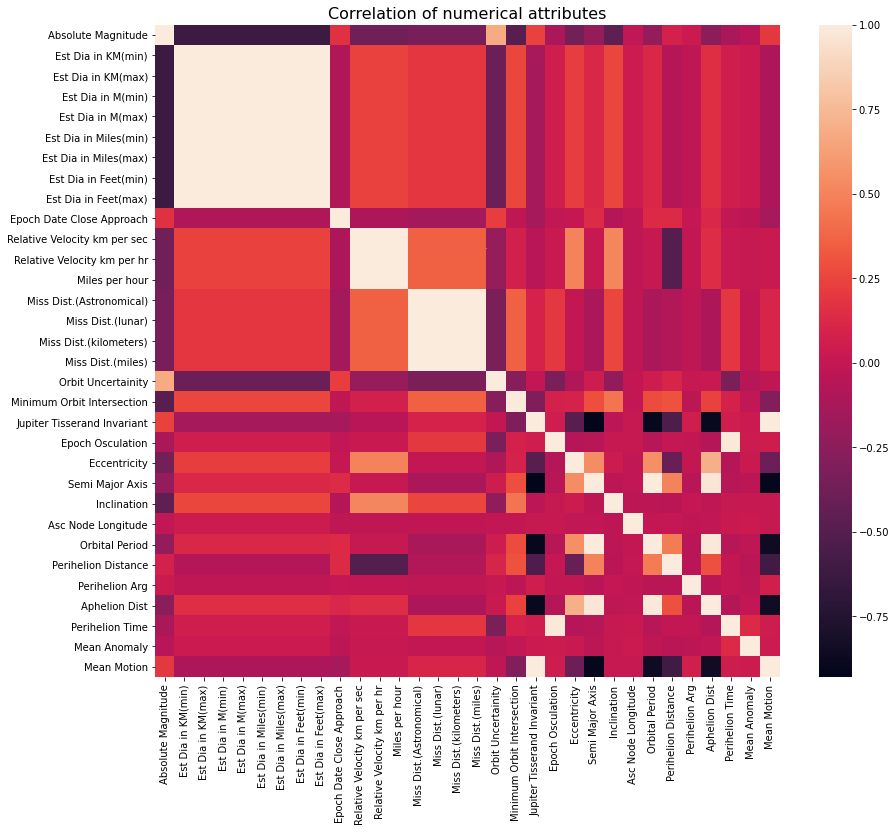

In [90]:
correlation = X.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

<h4>Observations</h4>
<li>Let's focus on the lighter parts of the graph</li>
<ol>
    <li>The Estimated Diameters have a high correlation because they are telling the "same thing"</li>
    <li>The Relatives velocity have a high correlation because they are telling the "same thing"</li>
    <li>The Miss Distance have a high correlation because they are telling the "same thing"</li>
</ol>

In [91]:
#We can see there are 8 columns indicating Min and Max values of the Estimated Diameter of asteroids
#We are going to create a new column with the Mean value of KM(min) and KM(max) and then eliminate the rest
X['avg_dia'] = X[['Est Dia in KM(min)', 'Est Dia in KM(max)']].mean(axis=1)
X.drop(columns=['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)',
               'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
               'Est Dia in Feet(min)', 'Est Dia in Feet(max)'], inplace=True)

In [92]:
#There are 3 columns indicating Relative Velocity
#We are going to just leave the Relative Velocity km per hr
X.drop(columns=['Relative Velocity km per sec', 'Miles per hour'], inplace=True)

In [93]:
#There are 4 columns indicating Miss Distance
#We are going to just leave Mist Distance in kilometers
X.drop(columns=['Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)'], inplace=True)

In [94]:
#Lets see the variability of categorical columns
cat_columns = X.select_dtypes(include=['object']).columns
#We dont count these 2 columns because they are dates, we will process them later
cat_columns = cat_columns.drop(['Close Approach Date', 'Orbit Determination Date'])
for col in cat_columns:
    print(X[col].value_counts(ascending=True, normalize=True))

Earth    1.0
Name: Orbiting Body, dtype: float64
J2000    1.0
Name: Equinox, dtype: float64


<h4>Observations</h4>
<li>We can see both "Orbiting Body" and "Equinox" have only 1 possible value, so we are going to eliminate them</li>

In [95]:
#Eliminating Orbiting Body and Equinox columns
X.drop(columns=cat_columns, inplace=True)

<h2>Missing Data</h2>
<ul>
    <li>Lets see if there any missing values and visualize them</li>
</ul>

In [96]:
X.isnull().sum()

Absolute Magnitude             0
Close Approach Date            0
Epoch Date Close Approach      0
Relative Velocity km per hr    0
Miss Dist.(kilometers)         0
Orbit Determination Date       0
Orbit Uncertainity             0
Minimum Orbit Intersection     0
Jupiter Tisserand Invariant    0
Epoch Osculation               0
Eccentricity                   0
Semi Major Axis                0
Inclination                    0
Asc Node Longitude             0
Orbital Period                 0
Perihelion Distance            0
Perihelion Arg                 0
Aphelion Dist                  0
Perihelion Time                0
Mean Anomaly                   0
Mean Motion                    0
avg_dia                        0
dtype: int64

<li>Luckily we don't have any missing values, so we can proceed with modeling</li>

<h2>Preprocessing + Pipeline</h2>
<li>First, lets split the data into train and test dataframes</li>
<p>Steps:</p>
<ol>
    <li>Extract year, month and day from the date columns so we can use them as numerical features</li>
    <li>Add Year, Month and Day for each date column to the dataset</li>
    <li>Eliminate date columns from the dataset</li>
    <li>Fit the model</li>
</ol>

In [97]:
#Import Pipeline
from sklearn.pipeline import Pipeline
#Import model and GridSearch for Hyperparameter Optimization
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [98]:
#Splitting the data
#We dont use train_test_split here because it will randomly assign different rows to train and test,
#But, because we have time based features, we split the data based on time
X_train, X_test= np.split(X, [int(.80 *len(X))])
y_train, y_test= np.split(y, [int(.80 *len(X))])

In [99]:
#Import the BaseEstimator
from sklearn.base import BaseEstimator

#Define Date pre-processor class
class DateProcessor(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, df):
        dateCols = ['Close Approach Date', 'Orbit Determination Date']
        new_df = df.copy()
        for col in dateCols:
            
            new_df[col] = pd.to_datetime(new_df[col], errors="coerce",format="%Y-%m-%d")
            #df.dropna(axis=1, subset=['date'], inplace=True)
            
            newColsDict = {'day': str(col) + " day", 'month': str(col) + " month", 'year': str(col) + " year"}
            new_df[newColsDict['day']] = new_df[col].dt.day
            new_df[newColsDict['month']] = new_df[col].dt.month
            new_df[newColsDict['year']] = new_df[col].dt.year
            
        new_df.drop(inplace=True, columns=dateCols)
        return new_df

In [100]:
#Defining the pipeline
estimator = XGBClassifier(learning_rate=0.1)
model_pipeline = Pipeline(steps=[
                                ('process_dates', DateProcessor()),
                                ('XGBoost', estimator)
                                ])
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('process_dates', DateProcessor()),
                ('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [101]:
#Score
model_pipeline.score(X_test, y_test)

1.0

In [102]:
#Lets try another score method
from sklearn.metrics import accuracy_score

y_pred = model_pipeline.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [103]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Hazard', 'Not Hazard'])
print("\t\tClassification Report\n\n", report)

		Classification Report

               precision    recall  f1-score   support

      Hazard       1.00      1.00      1.00       815
  Not Hazard       1.00      1.00      1.00       123

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938



In [104]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

Confusion Matrix
 [[815   0]
 [  0 123]]
